In [1]:
# Importing the necessary libraries 
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print("Import Successful")

Import Successful


In [2]:
# Set the working directory to where the dataset resides
os.chdir("F:\Python_Edureka\projects\Project_2")

# Verify the set working directory
os.getcwd()

'F:\\Python_Edureka\\projects\\Project_2'

### 1)Read the data fileand check for any missing values

In [3]:
# Reading the data file into a Pandas Dataframe
food_data = pd.read_csv("Project_Data_1.csv", index_col = 0, thousands = ",")
data = food_data.copy()
food_data.index.names = ["country"]
food_data.columns.names = ["year"]

# Display the first five rows of the data
food_data.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [4]:
# Check for missing values in the data 
food_data.isnull().values.any()

False

In [6]:
to_be_scaled = food_data.iloc[:, 0:].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
food_data = scaler.fit_transform(to_be_scaled)
food_data

array([[ 1.03110452,  1.01641938,  1.02196785, ...,  0.45473638,
         0.38936941,  0.33411829],
       [-0.66846748, -0.68394081, -0.67693899, ..., -0.67479082,
        -0.67927409, -0.68603309],
       [-0.65552658, -0.66645639, -0.66356177, ..., -0.56088892,
        -0.54153782, -0.52545371],
       ...,
       [ 0.29347302,  0.28207359,  0.31297523, ..., -0.16223226,
        -0.16157569, -0.1759574 ],
       [ 1.03110452,  1.13443924,  1.34302111, ...,  1.33747613,
         1.20153847,  1.03783382],
       [ 0.91463639,  0.96396611,  0.99075433, ...,  2.41479829,
         2.51715736,  2.58222966]])

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(food_data)
print(pca.explained_variance_ratio_)

[0.92039771 0.05704903]


In [9]:
new_data = pd.DataFrame(principal_components, columns = ["pca1", "pca2"])
new_data.index = data.index
new_data.head()

,pca1,pca2
Sales of Wheat in tons,,
Afghanistan,3.498735,0.975856
Albania,-2.936103,0.012171
Algeria,-2.725665,-0.185039
American Samoa,-3.445596,0.005623
Andorra,-3.181315,0.033922


{1: 3641.966555746667, 2: 927.1243171671338, 3: 551.956791265397, 4: 429.3482312069803, 5: 332.3892108100146, 6: 258.6845648183441, 7: 218.42479802348674, 8: 171.33594077985504, 9: 140.90901671607713}


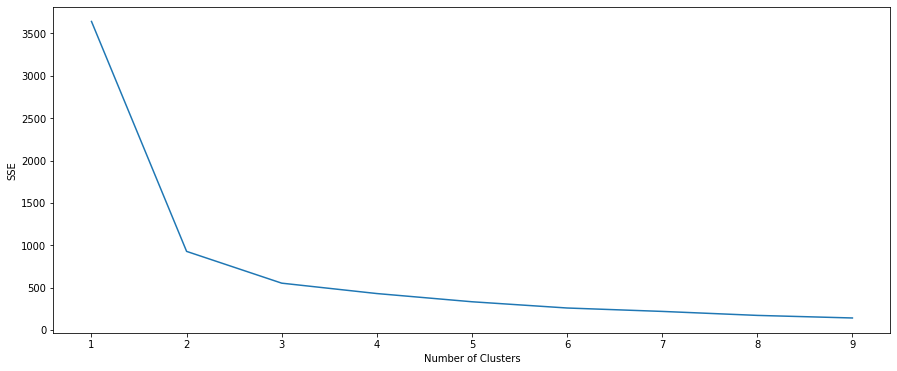

In [11]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(new_data)
    sse[k] = kmeans.inertia_
print(sse)
plt.figure(figsize = (15, 6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
km = KMeans(n_clusters = 3)
km.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
centers = km.cluster_centers_
print(centers)

[[-2.47393975  0.05330768]
 [ 3.94539763 -0.35411163]
 [ 9.47222647  0.6368249 ]]


In [16]:
new_labels = km.labels_
print(new_labels)

[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 1 0 1 0 0 0 0 1 1 2 0 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 2 1 0 2 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 2 0 2 0 0 0 0 1 0 0 1 1 2 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 2 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 2 0 0 0 1 1 2 0 0 1 0 2 0 0 0 0 1 0 2 2 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1]


In [17]:
new_data["labels"] = new_labels
new_data.head()

,pca1,pca2,labels
Sales of Wheat in tons,,,
Afghanistan,3.498735,0.975856,1
Albania,-2.936103,0.012171,0
Algeria,-2.725665,-0.185039,0
American Samoa,-3.445596,0.005623,0
Andorra,-3.181315,0.033922,0


In [46]:
new_data.sort_values(["labels", "pca1", "pca2"])
new_data.to_csv("output.csv", index = True)

<Figure size 1080x432 with 0 Axes>

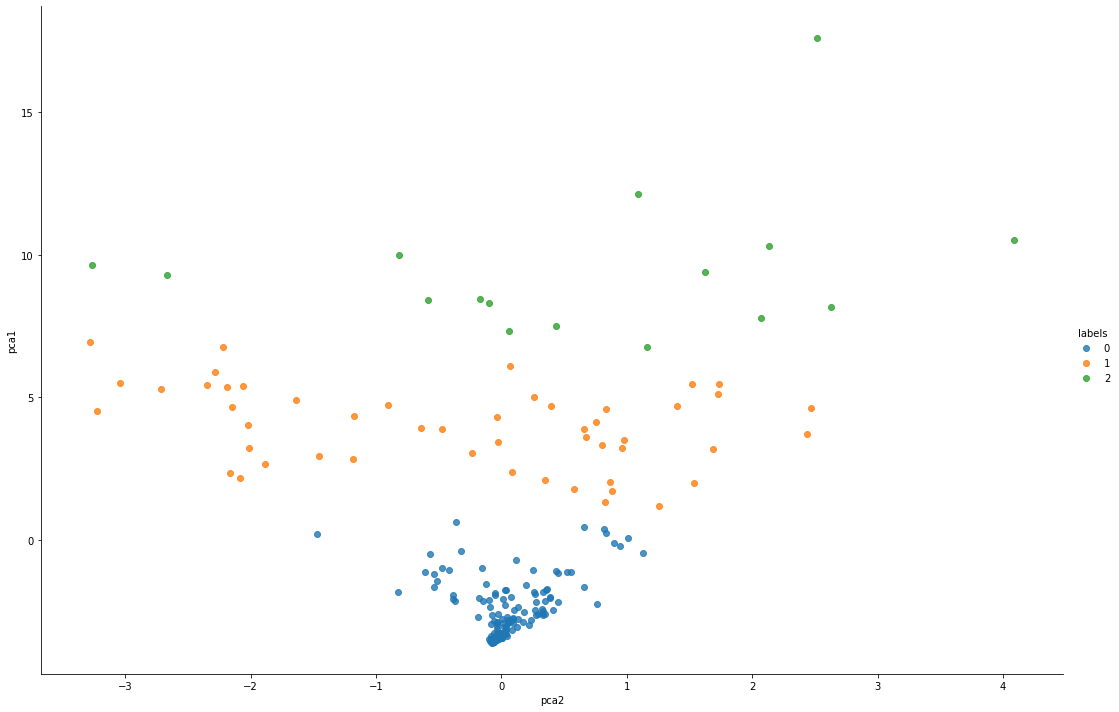

In [35]:
plt.figure(figsize = (15, 6))
ax = sns.lmplot(x = "pca2", y = "pca1", hue = "labels", data = new_data, fit_reg = False, height = 10, aspect = 1.5)

In [38]:
data["clusters"] = km.labels_
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,clusters
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,1
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0


In [42]:
data.sort_values(["clusters"]).head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,clusters
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,,
Guam,103,101,96,110,146,93,91,89,87,86,44,45,44,47,41,42,39,36,0
Kazakhstan,95,87,85,84,85,94,109,137,163,134,141,148,150,155,152,147,144,139,0
Switzerland,14,13,12,11,10,10,9,8,8,8,7,6,6,6,6,5,5,5,0
Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,0
Kuwait,89,84,80,75,72,68,66,64,61,35,33,33,30,29,29,30,25,25,0


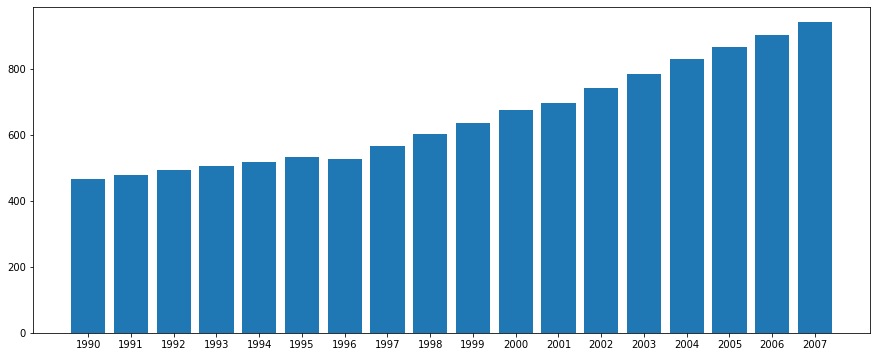

In [51]:
# Largest Importer and constantly increasing
data.loc["Sierra Leone"]
X = data.loc["Sierra Leone"].index[0:18]
Y = data.loc["Sierra Leone"].values[0:18]
plt.figure(figsize = (15, 6))
ax= plt.bar(X, Y)

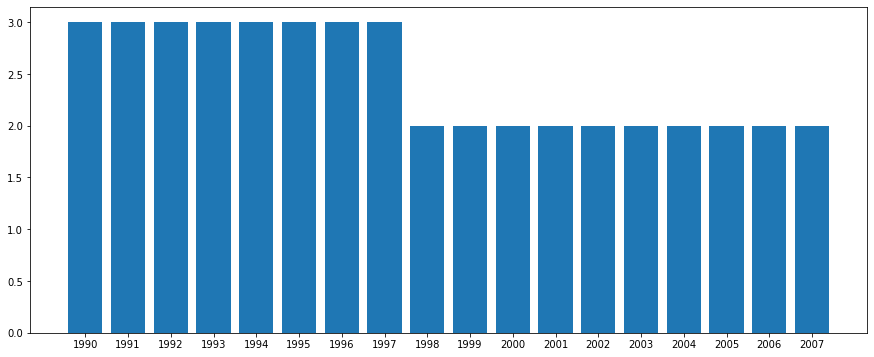

In [52]:
# Most consistent
data.loc["Monaco"]
X = data.loc["Monaco"].index[0:18]
Y = data.loc["Monaco"].values[0:18]
plt.figure(figsize = (15, 6))
ax= plt.bar(X, Y)